### 전처리하기

In [69]:
import numpy as np
import pandas as pd

adr_df = pd.read_excel("C:/Python_practice/DL_project/gwangjin_contest/광진구_데이터프레임_230425.xlsx",index_col=0)

In [70]:
adr_df.set_index("지번주소",inplace=True) # 인덱스 설정
adr_df.drop(columns=["도로명주소","위도","경도","소지역코드","지하철이름","주차장과의최단거리"],inplace=True) # 안쓸 데이터 드랍

In [71]:
adr_df.info() # 타입확인 및 결측치 확인

<class 'pandas.core.frame.DataFrame'>
Index: 23216 entries, 서울특별시 광진구 광장동  102 to 서울특별시 광진구 화양동  99
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   인구밀도                  23216 non-null  float64
 1   총 사업체수                23216 non-null  int64  
 2   반경 1km 이내 불법주정차 단속 수  23216 non-null  int64  
 3   토지면적                  23216 non-null  object 
 4   공시지가_기준년월             23213 non-null  object 
 5   공시지가(원/면적)            23213 non-null  float64
 6   역과의최단거리               23216 non-null  int64  
 7   반경 1km 이내 주차장수        23216 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.6+ MB


### 결측치 삭제

In [72]:
adr_df.dropna(inplace=True)

### 타입변환

In [73]:
adr_df["토지면적"] = pd.to_numeric(adr_df["토지면적"])

In [74]:
adr_df["공시지가(원/면적)"] = adr_df["공시지가(원/면적)"].astype(int)

### 공시지가_기준년월 2013->0, 2014-> 1, 2015-> 2, 2016-> 3, 2022/01-> 4, 2022/07->5

In [75]:
adr_df["공시지가_기준년월"].unique()

array(['2022년01월', '2022년07월', '2014년01월', '2013년01월', '2016년01월',
       '2015년01월'], dtype=object)

In [76]:
adr_df["공시지가_기준년월"].replace({"2013년01월":0,"2014년01월":1,"2015년01월":2,"2016년01월":3,"2022년01월":4,"2022년07월":5},inplace=True) 

In [77]:
adr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23213 entries, 서울특별시 광진구 광장동  102 to 서울특별시 광진구 화양동  99
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   인구밀도                  23213 non-null  float64
 1   총 사업체수                23213 non-null  int64  
 2   반경 1km 이내 불법주정차 단속 수  23213 non-null  int64  
 3   토지면적                  23213 non-null  float64
 4   공시지가_기준년월             23213 non-null  int64  
 5   공시지가(원/면적)            23213 non-null  int32  
 6   역과의최단거리               23213 non-null  int64  
 7   반경 1km 이내 주차장수        23213 non-null  int64  
dtypes: float64(2), int32(1), int64(5)
memory usage: 1.5+ MB


In [12]:
adr_df

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,토지면적,공시지가_기준년월,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수
지번주소,,,,,,,,
서울특별시 광진구 광장동 102,7067.7,136,2,2211.8,4,6324000,1144,41
서울특별시 광진구 광장동 104,7067.7,136,2,172.1,5,5097000,1166,41
서울특별시 광진구 광장동 105,7067.7,136,2,848.8,4,5202000,1068,41
서울특별시 광진구 광장동 106,7067.7,136,2,452.8,4,5097000,1038,41
서울특별시 광진구 광장동 107,7067.7,136,2,403.9,4,5793000,1011,42
...,...,...,...,...,...,...,...,...
서울특별시 광진구 화양동 95-5,52366.1,44,28,152.0,4,4346000,630,75
서울특별시 광진구 화양동 96-2,52366.1,44,31,165.0,4,4346000,630,75
서울특별시 광진구 화양동 97,52366.1,44,28,188.0,4,5095000,633,74


### EDA

### 폰트 설정하기

In [13]:
def get_font():
    import matplotlib.font_manager as font_manager
    import matplotlib as mpl
# Add every font at the specified location
    font_dir = ['C:/Users/gihun/Fonts/']
    for font in font_manager.findSystemFonts(fontpaths=font_dir):
        print(mpl.font_manager.FontProperties(fname=font).get_name())
        font_manager.fontManager.addfont(font)
# Set font family globally
    mpl.rcParams['font.family'] = 'NanumBarunGothic'
    return mpl.rcParams['font.family']

In [14]:
get_font()

['NanumBarunGothic']

In [15]:
# 기초통계량 확인하기
adr_df.describe()

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,토지면적,공시지가_기준년월,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수
count,23213.000000,23213.000000,23213.000000,23213.000000,23213.000000,2.321300e+04,23213.000000,23213.000000
mean,34900.199065,66.497480,21.409555,360.372390,3.999138,5.188785e+06,697.772326,94.107698
std,14909.802802,75.688845,8.303961,3905.284235,0.077100,1.905761e+06,307.986961,32.106868
min,0.000000,0.000000,2.000000,1.000000,0.000000,2.900000e+04,6.000000,14.000000
25%,24129.400000,27.000000,15.000000,125.500000,4.000000,4.186000e+06,480.000000,68.000000
50%,36796.500000,48.000000,22.000000,162.600000,4.000000,4.905000e+06,660.000000,93.000000
75%,46032.500000,79.000000,28.000000,217.500000,4.000000,5.647000e+06,864.000000,116.000000
max,138678.800000,1448.000000,45.000000,501359.000000,5.000000,4.750000e+07,1907.000000,174.000000


c:\Users\dohee\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\dohee\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


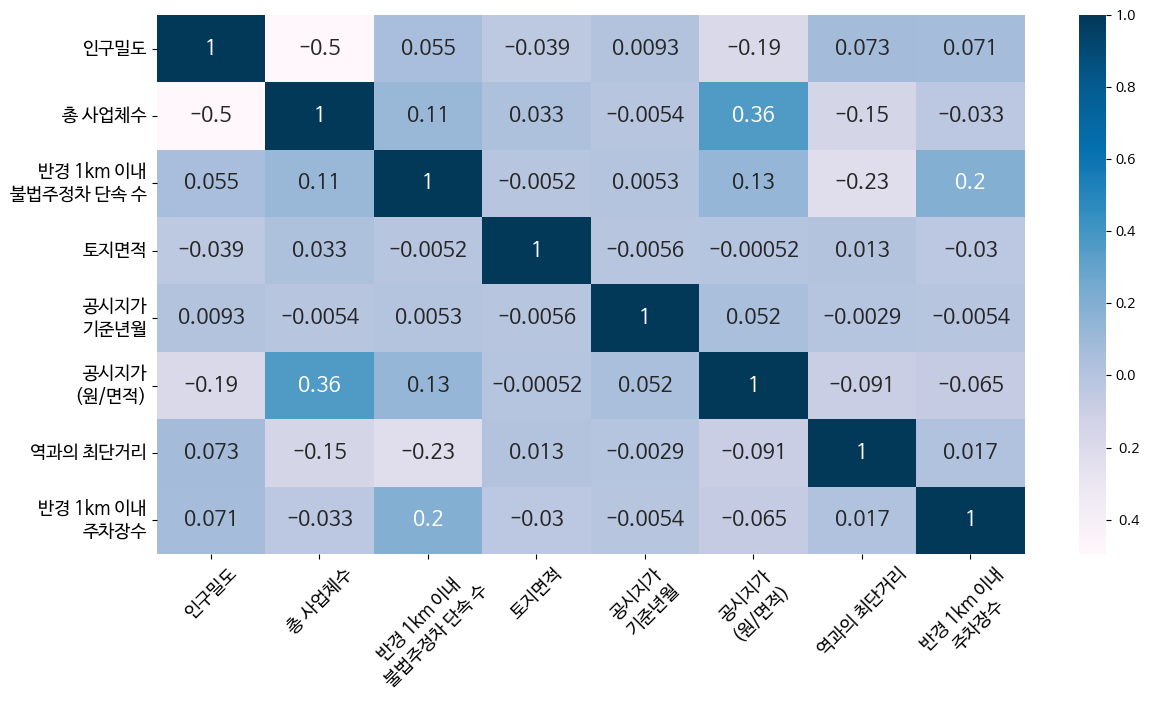

In [24]:
### 변수간 상관관계 분석하기
import matplotlib.pyplot as plt
import seaborn as sns
corr = adr_df.corr()

plt.figure(figsize=(14, 7))  # 크기 조절 (가로, 세로)
sns.heatmap(corr, annot = True, annot_kws = {"size" : 15}, cmap = 'PuBu')

tick_labels = ['인구밀도', '총 사업체수', '반경 1km 이내\n불법주정차 단속 수', '토지면적', '공시지가\n기준년월',
               '공시지가\n(원/면적)', '역과의 최단거리', '반경 1km 이내\n주차장수']
tick_positions = np.arange(0.5, len(tick_labels), 1)

plt.xticks(tick_positions, tick_labels, rotation=45, fontsize=13)
plt.yticks(tick_positions, tick_labels, fontsize=13)
plt.show()

# plt.figure(figsize=(10,8))
# sns.heatmap(corr,cmap=plt.cm.PuBu,annot=True, annot_kws = {"size" : 16},linecolor = "white",linewidths = 0.1)
# plt.xticks(rotation=45)
# plt.show()

In [25]:
# 상관계수 행렬 계산
corr_matrix = adr_df.corr()

# 대각선을 제외한 상관계수의 최대값과 최소값 계산
max_corr = np.max(corr_matrix.values[np.triu_indices(len(corr_matrix), k=1)])
min_corr = np.min(corr_matrix.values[np.triu_indices(len(corr_matrix), k=1)])
print(f'최대값 : {max_corr}, 최소값 : {min_corr}')

# 가장 큰 값과 가장 작은 값의 차이 계산
diff_corr = np.abs(max_corr - min_corr)

# 차이가 0.5보다 크면 비선형 데이터, 작으면 선형 데이터로 간주
if diff_corr > 0.5:
    print("비선형 데이터입니다.")
else:
    print("선형 데이터입니다.")

최대값 : 0.3623291496114795, 최소값 : -0.49544979817568235
비선형 데이터입니다.


c:\Users\dohee\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dohee\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dohee\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dohee\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dohee\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dohee\anaconda3\lib\site-packages\seaborn\a

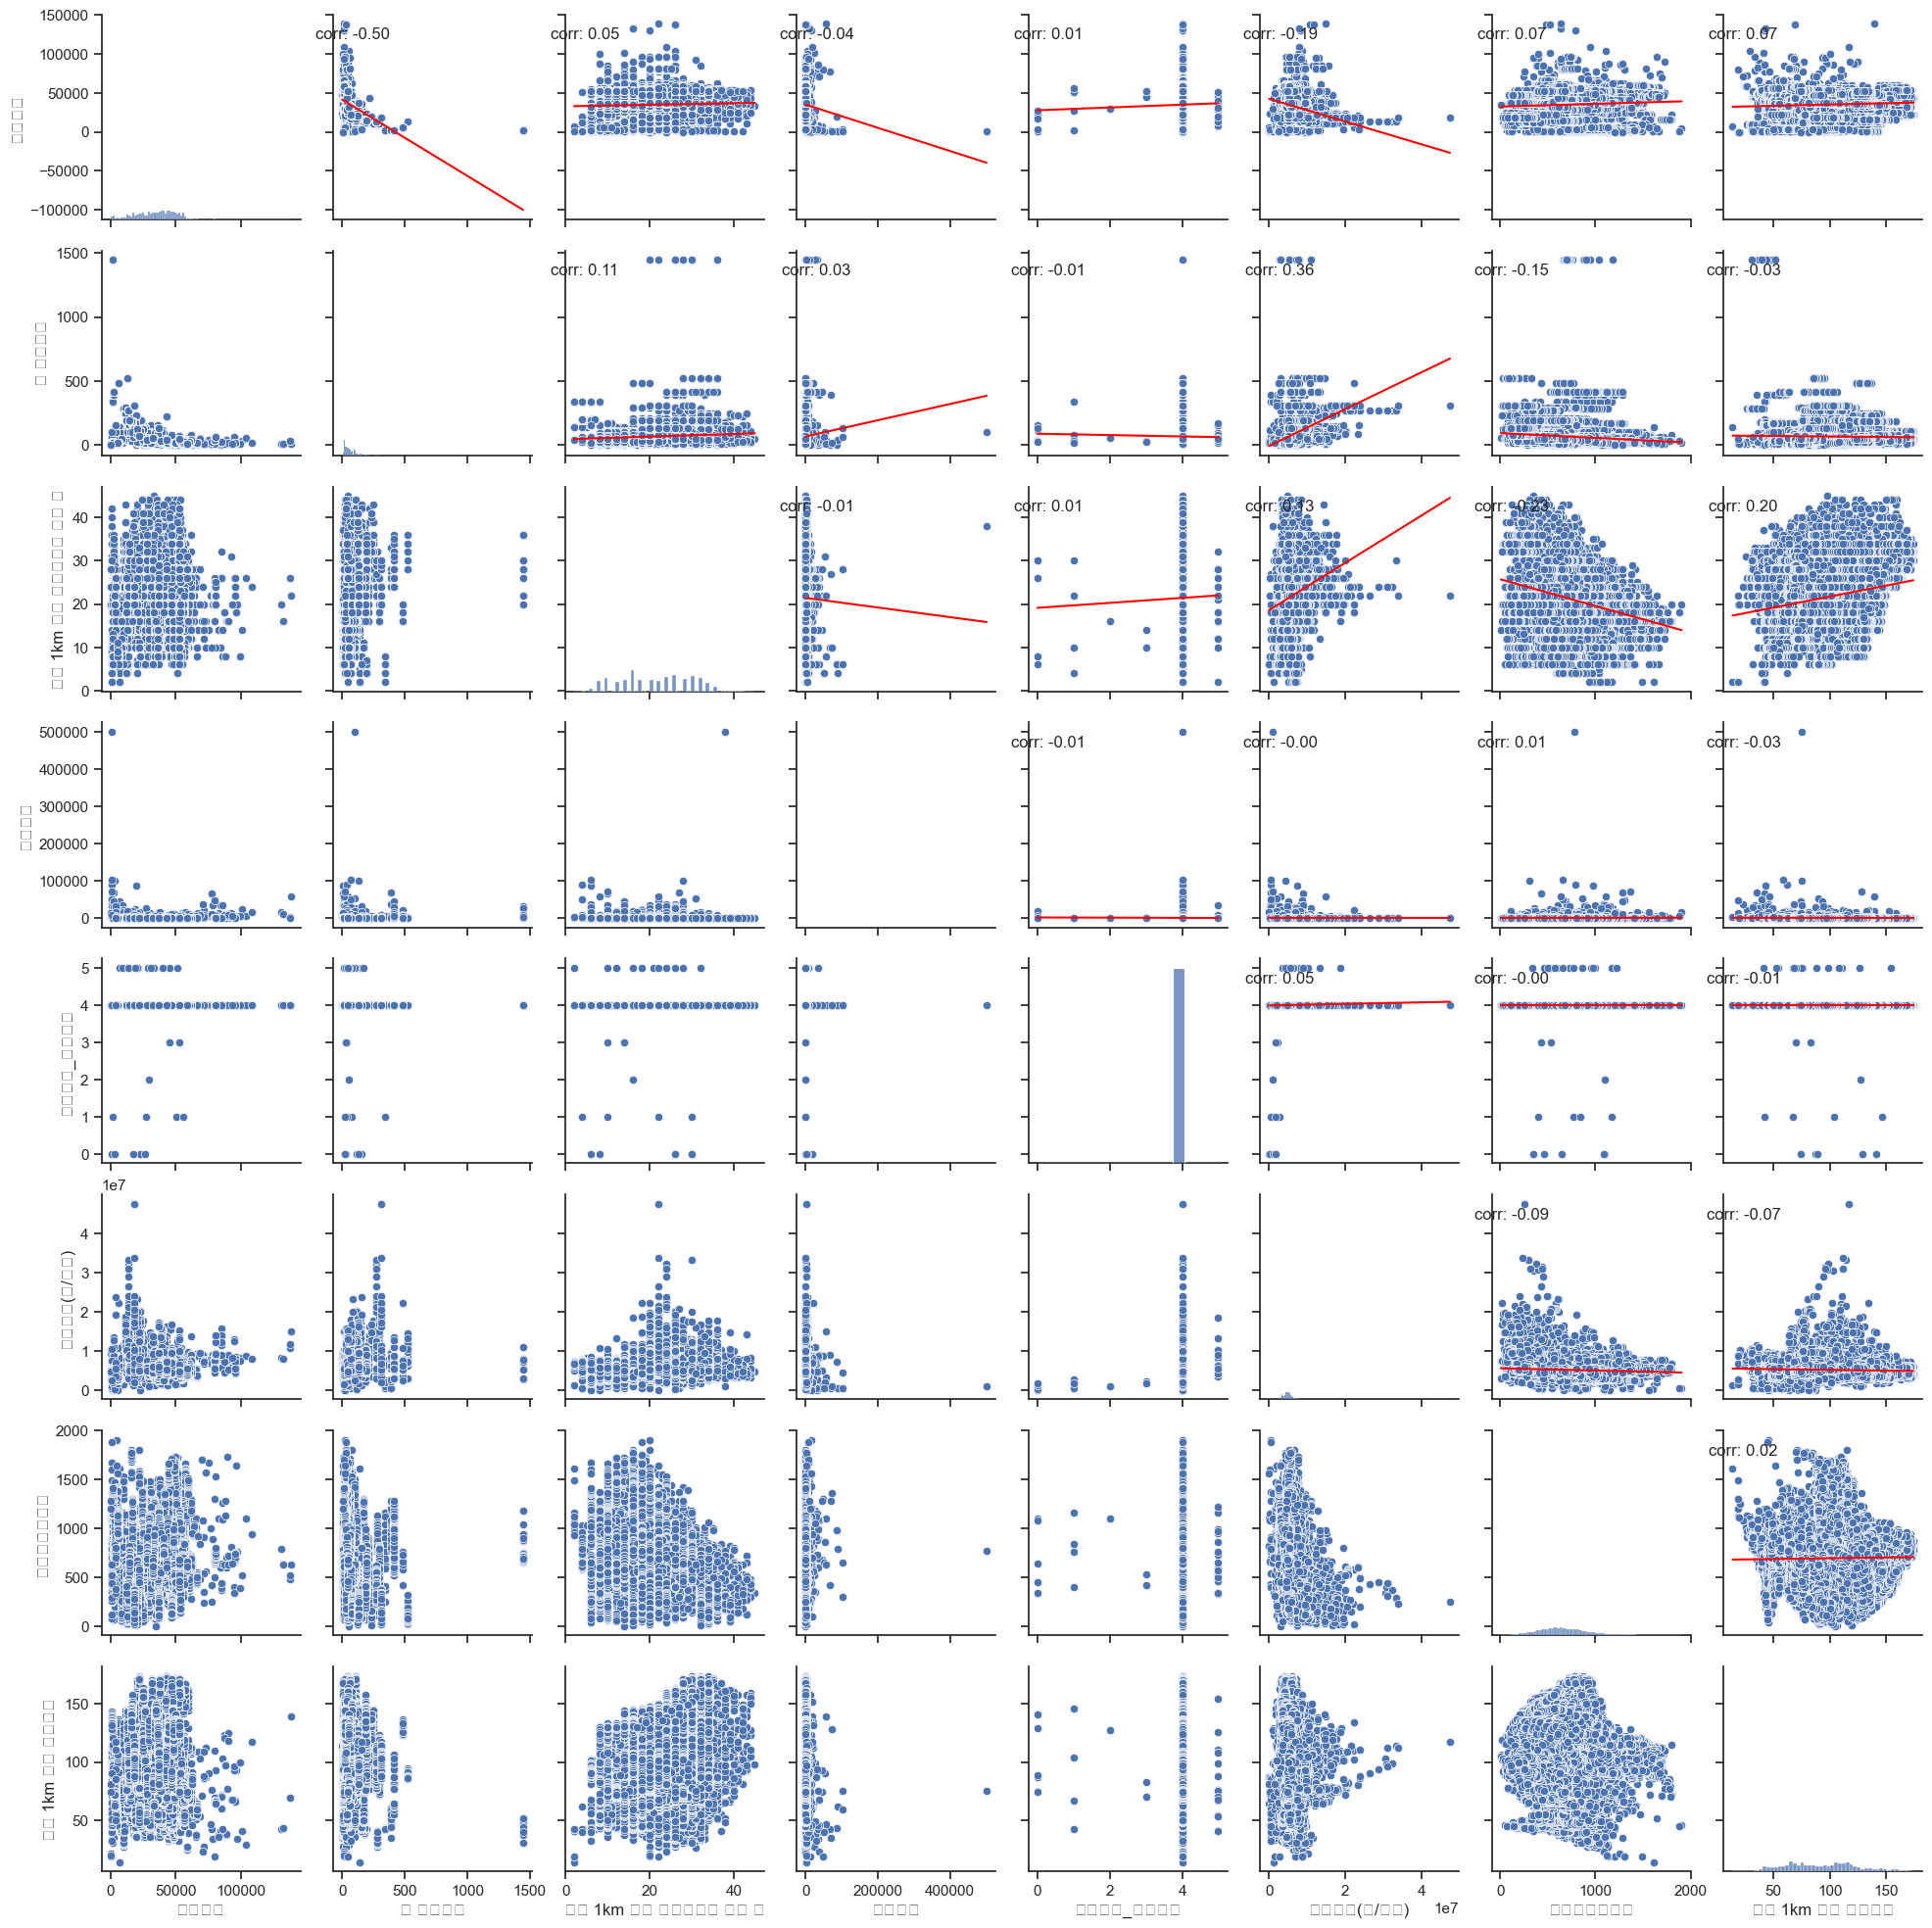

In [26]:
# 기준년월 제외한 산점도 행렬 그리기

# features 리스트의 열들만으로 이루어진 데이터프레임 생성
graph_df = adr_df.copy()

# 상관계수 행렬 계산
corr_matrix = graph_df.corr()

# 산점도 행렬 그리기
sns.set(style="ticks")
g = sns.pairplot(graph_df)

# 각 산점도에 맞춘 1차식 선형 그래프 그리기
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].annotate("corr: {:.2f}".format(corr_matrix.iloc[i, j]), (0.1, 0.9), xycoords='axes fraction', ha='center', va='center')
    g.axes[i, j].plot(np.unique(graph_df.iloc[:, j]), 
                      np.poly1d(np.polyfit(graph_df.iloc[:, j], graph_df.iloc[:, i], 1))(np.unique(graph_df.iloc[:, j])), 
                      color='red')
    plt.setp(g.axes[i, j].get_xticklabels(), rotation=45)
    plt.setp(g.axes[i, j].get_yticklabels(), rotation=0)
    
plt.show()

### 정규성 검정하기

In [78]:
def get_shapiro(df,column_name):
    from scipy import stats
    # 샤피로 검정
    statistic, pvalue = stats.shapiro(df[column_name])
    # 결과 출력
    print(f'statistic: {statistic:.4f}, p-value: {pvalue:.6f}')
    if pvalue > 0.05:
        print('데이터가 정규분포를 따릅니다.')
    else:
        print('데이터가 정규분포를 따르지 않습니다.')

In [79]:
for item in list(adr_df.columns):
    print(item)
    get_shapiro(adr_df,item) # 공시지가_기준년월은 범주형 변수이므로 제외하기

인구밀도
statistic: 0.9765, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
총 사업체수
statistic: 0.5682, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
반경 1km 이내 불법주정차 단속 수
statistic: 0.9677, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
토지면적
statistic: 0.0244, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
공시지가_기준년월
statistic: 0.0108, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
공시지가(원/면적)
statistic: 0.7383, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
역과의최단거리
statistic: 0.9722, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
반경 1km 이내 주차장수
statistic: 0.9811, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.


c:\Users\dohee\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [35]:
def plot_histograms(df):
    '''
    히스토그램을 이용해서 데이터의 분포 확인하기
    '''
    for column in df.columns:
        plt.hist(df[column], bins=20)
        plt.title(column)
        plt.show()

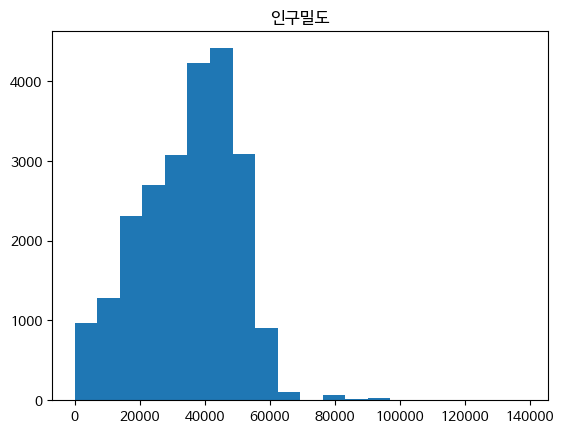

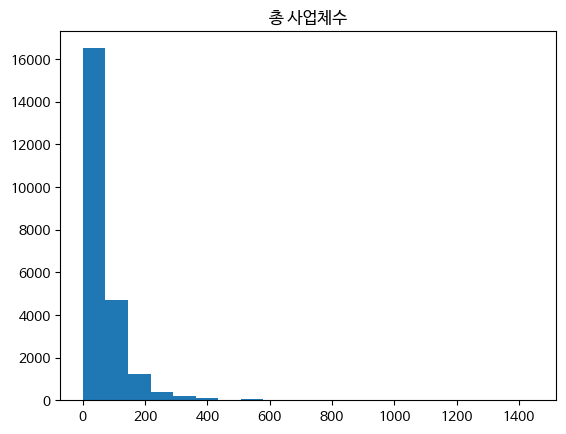

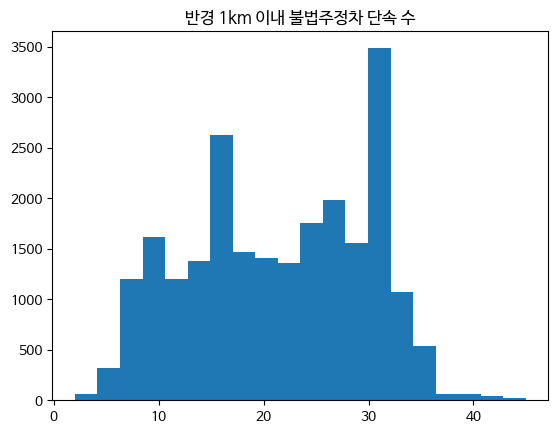

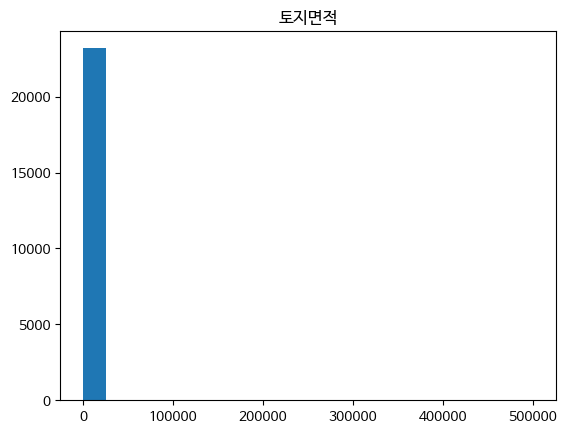

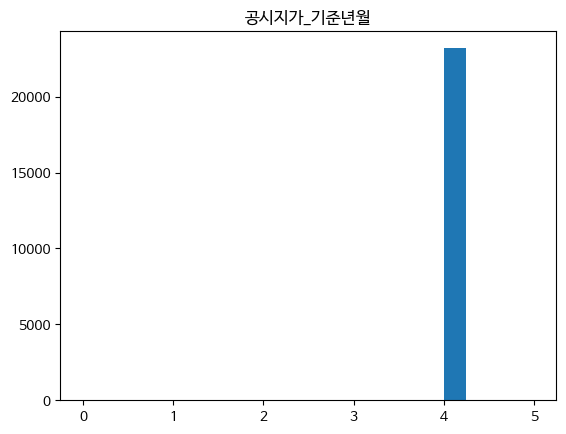

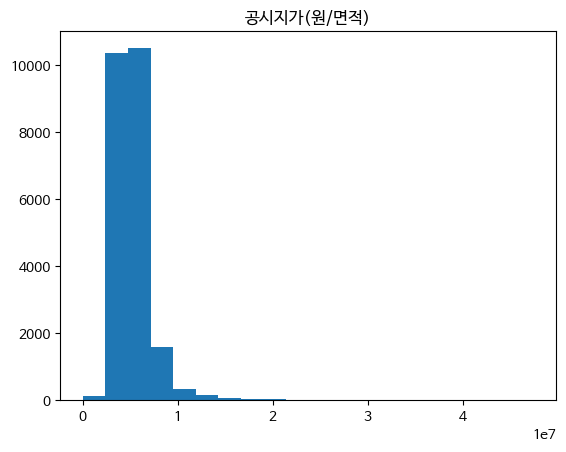

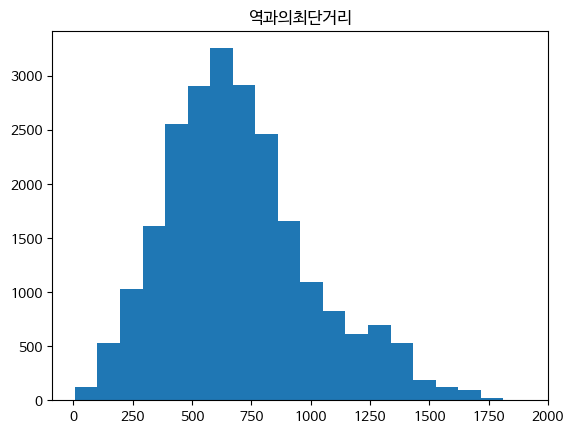

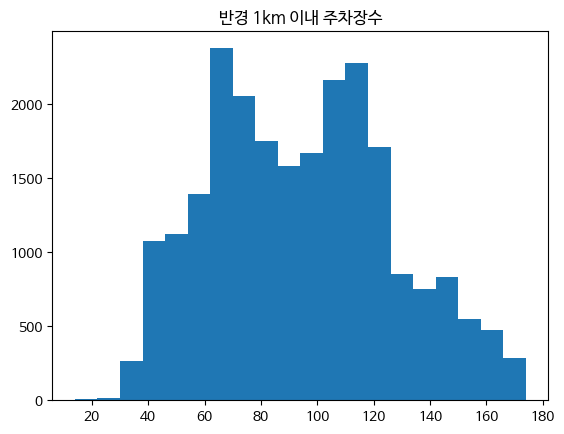

In [20]:
plot_histograms(adr_df)

### 양수 인것들만 로그 변환해서 데이터 분포 변환하기

In [28]:
# 로그 변환하기 전의 데이터프레임 복사
adr_df2 = adr_df.copy()

In [29]:
def log_transform(dataframe, columns):
    '''
    데이터프레임과 컬럼을 인자로 받아서
    로그 변환이 적용된 데이터프레임을 반환하는 함수입니다.
    '''
    for column in columns:
        filtered = dataframe[column][dataframe[column] > 0] # filter out negative or zero values
        dataframe[column] = np.log(filtered) # apply log transformation
    return dataframe

In [30]:
log_df = log_transform(adr_df, adr_df.columns)
log_df.dropna(inplace=True) # 로그변환후에 결측치 제거하기

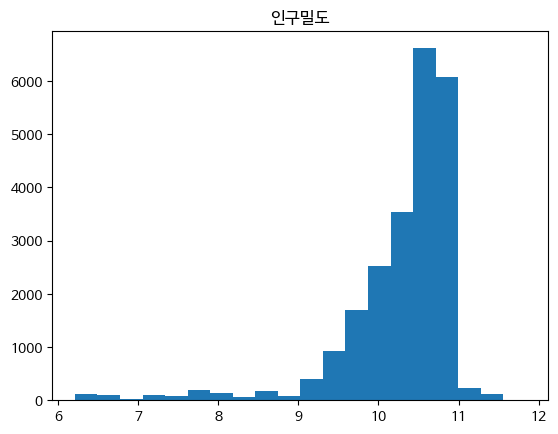

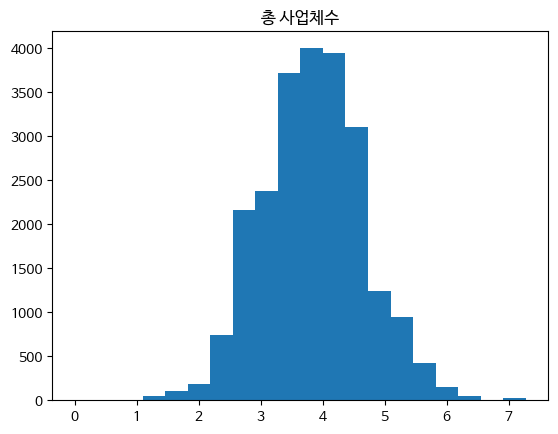

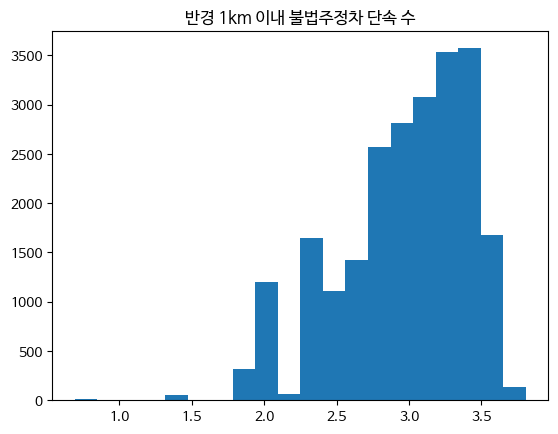

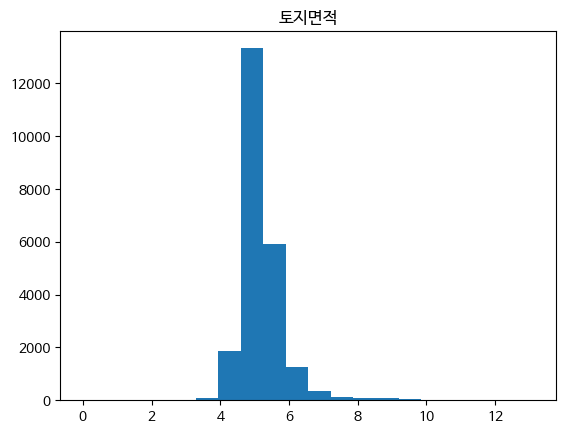

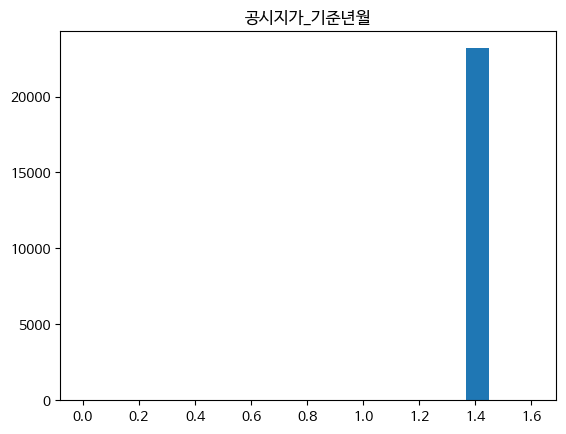

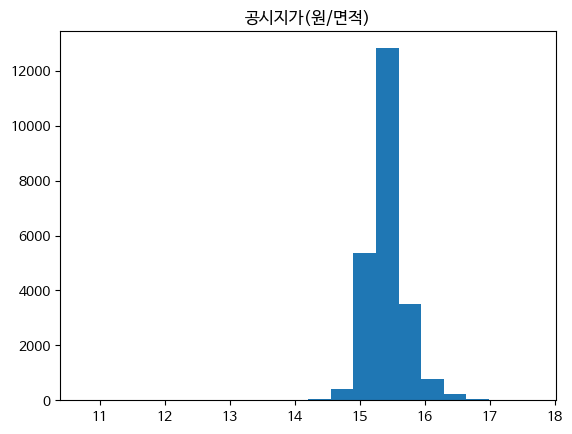

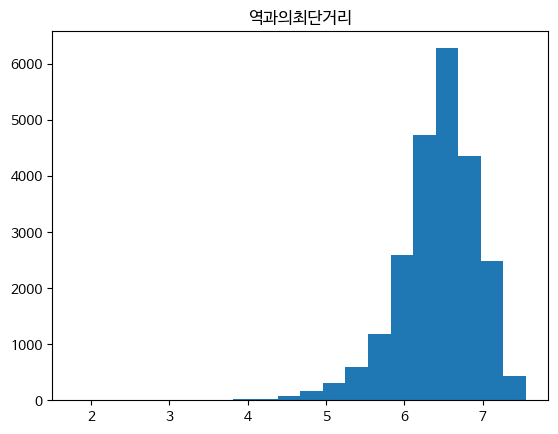

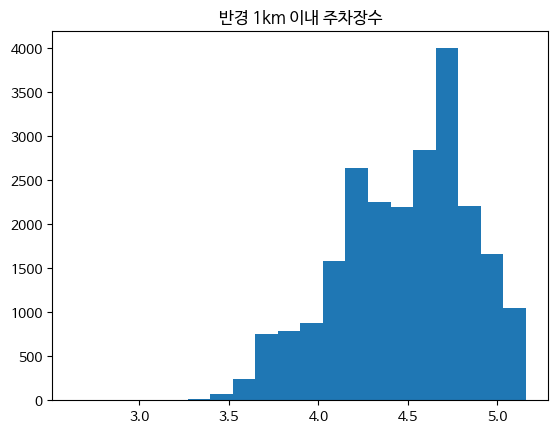

In [24]:
plot_histograms(log_df)

### 토지면적과 공시지가_기준년월 데이터 삭제: 모델에 악영향을 줄 것으로 생각이 됨

In [31]:
log_df.drop(columns=["토지면적", "공시지가_기준년월"],inplace=True) # 안쓸 데이터 드랍

### 로그 변환 후에 정규성 확인하기

In [36]:
for item in list(adr_df.columns):
    print(item)
    get_shapiro(log_df,item) # 공시지가_기준년월은 범주형 변수이므로 제외하기

인구밀도
statistic: 0.7423, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
총 사업체수
statistic: 0.9966, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
반경 1km 이내 불법주정차 단속 수
statistic: 0.9353, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
공시지가(원/면적)
statistic: 0.9167, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
역과의최단거리
statistic: 0.9530, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
반경 1km 이내 주차장수
statistic: 0.9746, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.


### 스케일링 하기

In [37]:
def get_standard_scaler(df):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(df.values)
    scaled_df = pd.DataFrame(data=scaled_df, index=df.index, columns=df.columns)
    return scaled_df

In [38]:
scaled_df = get_standard_scaler(log_df)

In [62]:
scaled_df

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수
지번주소,,,,,,
서울특별시 광진구 광장동 102,-1.976258,1.306597,-5.050624,0.806595,1.201040,-2.095142
서울특별시 광진구 광장동 104,-1.976258,1.306597,-5.050624,0.101438,1.238866,-2.095142
서울특별시 광진구 광장동 105,-1.976258,1.306597,-5.050624,0.168099,1.064527,-2.095142
서울특별시 광진구 광장동 106,-1.976258,1.306597,-5.050624,0.101438,1.007947,-2.095142
서울특별시 광진구 광장동 107,-1.976258,1.306597,-5.050624,0.519884,0.955609,-2.029383
...,...,...,...,...,...,...
서울특별시 광진구 화양동 95-5,0.783825,-0.079860,0.795017,-0.419654,0.016359,-0.447125
서울특별시 광진구 화양동 96-2,0.783825,-0.079860,1.020470,-0.419654,0.016359,-0.447125
서울특별시 광진구 화양동 97,0.783825,-0.079860,0.795017,0.100155,0.025793,-0.483755


### 이상치 확인하기

In [39]:
def remove_outliers(df, column_name):
    '''
    이 함수는 이상치의 개수를 출력하면서 
    이상치를 제거한 데이터프레임을 반환하는 함수입니다.
    '''
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    removed_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    # 이상치 세기
    num_outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)].shape[0]
    print(f"열이름: {column_name}, 이상치 개수: {num_outliers}")
    
    return removed_df

In [52]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

def get_font():
    font_dir = 'C:/Windows/Fonts/'  # 여기에 폰트가 있는 폴더의 경로를 입력하세요
    font_file = 'NanumGothic.ttf'  # 여기에 원하는 폰트 파일의 이름을 입력하세요

    font_path = font_dir + font_file
    font_manager.fontManager.addfont(font_path)
    mpl.rcParams['font.family'] = 'NanumBarunGothic'

get_font()

c:\Users\dohee\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


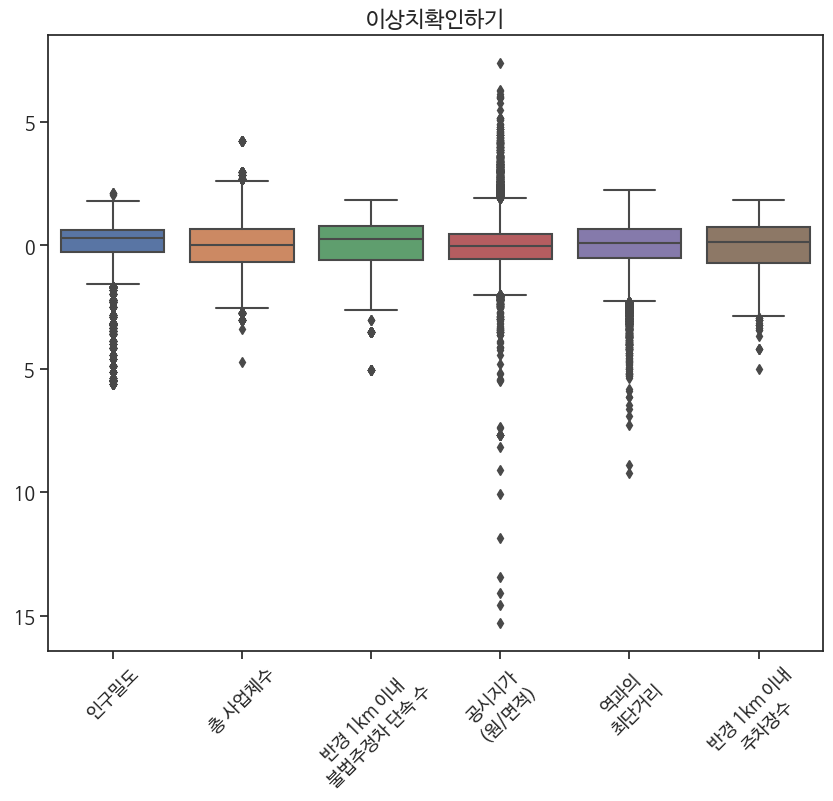

In [68]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.boxplot(data=scaled_df)
plt.title("이상치확인하기",fontsize=16)
plt.xticks(range(6), ['인구밀도', '총 사업체수', '반경 1km 이내\n불법주정차 단속 수',
                        '공시지가\n(원/면적)', '역과의\n최단거리', '반경 1km 이내\n주차장수'],
                        rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [177]:
for i in log_df.columns:
    scaled_df = remove_outliers(scaled_df, i)

열이름: 인구밀도, 이상치 개수: 1227
열이름: 총 사업체수, 이상치 개수: 193
열이름: 반경 1km 이내 불법주정차 단속 수, 이상치 개수: 248
열이름: 공시지가(원/면적), 이상치 개수: 915
열이름: 역과의최단거리, 이상치 개수: 465
열이름: 반경 1km 이내 주차장수, 이상치 개수: 10


In [204]:
scaled_df

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수
지번주소,,,,,,
서울특별시 광진구 광장동 185-6,-1.150108,1.723860,-2.275693,0.876154,0.013204,-2.029383
서울특별시 광진구 광장동 231-1,-0.761584,-0.326408,-1.485640,1.368075,-2.072920,-1.902435
서울특별시 광진구 광장동 258-10,-1.097420,0.052378,-1.979914,-0.054219,-1.051298,-1.722443
서울특별시 광진구 광장동 258-11,-1.097420,0.052378,-1.979914,-0.054219,-1.013879,-1.722443
서울특별시 광진구 광장동 258-12,-1.097420,0.052378,-1.979914,-0.054219,-1.391889,-1.664991
...,...,...,...,...,...,...
서울특별시 광진구 화양동 95-5,0.783825,-0.079860,0.795017,-0.419654,0.016359,-0.447125
서울특별시 광진구 화양동 96-2,0.783825,-0.079860,1.020470,-0.419654,0.016359,-0.447125
서울특별시 광진구 화양동 97,0.783825,-0.079860,0.795017,0.100155,0.025793,-0.483755


In [181]:
scaled_df.to_excel("./data/preprocessed_광진구_데이터프레임.xlsx")